In [ ]:
# import kagglehub
# import shutil
# import os

# # Download latest version for UTKFace
# downloaded_dataset_root_utk = kagglehub.dataset_download("moritzm00/utkface-cropped")
# print("Path where KaggleHub downloaded UTKFace files:", downloaded_dataset_root_utk)

# # Define the source directory for UTKFace
# source_image_dir_utk = os.path.join(downloaded_dataset_root_utk, "UTKFace")
# # Define the destination directory for UTKFace
# destination_image_dir_utk = "UTKFace"

# # Ensure the destination directory exists and is clean for UTKFace
# if os.path.exists(destination_image_dir_utk):
#     print(f"Removing existing directory: {destination_image_dir_utk}")
#     shutil.rmtree(destination_image_dir_utk)

# print(f"Copying contents from {source_image_dir_utk} to {destination_image_dir_utk}")
# shutil.copytree(source_image_dir_utk, destination_image_dir_utk)
# print(f"Dataset '{destination_image_dir_utk}' copied to current working directory.")

# # Download latest version for APPA-REAL-FACE-CROPPED
# downloaded_dataset_root_appa = kagglehub.dataset_download("abhikjha/appa-real-face-cropped")
# print("Path where KaggleHub downloaded APPA-REAL-FACE-CROPPED files:", downloaded_dataset_root_appa)

# # Define the source directory for APPA-REAL-FACE-CROPPED
# source_image_dir_appa = downloaded_dataset_root_appa # Corrected path: use the root directly
# # Define the destination directory for APPA-REAL-FACE-CROPPED
# destination_image_dir_appa = "APPA-REAL-FACE-CROPPED"

# # Ensure the destination directory exists and is clean for APPA-REAL-FACE-CROPPED
# if os.path.exists(destination_image_dir_appa):
#     print(f"Removing existing directory: {destination_image_dir_appa}")
#     shutil.rmtree(destination_image_dir_appa)

# print(f"Copying contents from {source_image_dir_appa} to {destination_image_dir_appa}")
# shutil.copytree(source_image_dir_appa, destination_image_dir_appa)
# print(f"Dataset '{destination_image_dir_appa}' copied to current working directory.")

100%|██████████| 116M/116M [00:08<00:00, 14.6MB/s] 

Extracting files...


Path where KaggleHub downloaded UTKFace files: C:\Users\mmatu\.cache\kagglehub\datasets\moritzm00\utkface-cropped\versions\1
Copying contents from C:\Users\mmatu\.cache\kagglehub\datasets\moritzm00\utkface-cropped\versions\1\UTKFace to UTKFace
Dataset 'UTKFace' copied to current working directory.


100%|██████████| 228M/228M [00:16<00:00, 14.9MB/s] 

Extracting files...


Path where KaggleHub downloaded APPA-REAL-FACE-CROPPED files: C:\Users\mmatu\.cache\kagglehub\datasets\abhikjha\appa-real-face-cropped\versions\1
Copying contents from C:\Users\mmatu\.cache\kagglehub\datasets\abhikjha\appa-real-face-cropped\versions\1 to APPA-REAL-FACE-CROPPED
Dataset 'APPA-REAL-FACE-CROPPED' copied to current working directory.


In [3]:
import pandas as pd #dataframes series
import numpy as np #skaiciavimai
import os # pathams visiems kad galetu vaiksciot po sistema
import matplotlib.pyplot as plt # duomenu atvaizdavimui


# Define dataset paths
utk_dataset_path = "UTKFace"
appa_dataset_base_path = "APPA-REAL-FACE-CROPPED"

In [41]:
import os
import pandas as pd

# -------------------------
# UTKFace dataset load
# -------------------------
def load_utkface_data(root_dir):
    data = []
    for filename in os.listdir(root_dir):
        if filename.endswith(".jpg"):
            parts = filename.split("_")
            if len(parts) >= 4:
                try:
                    age = int(parts[0])
                    gender = int(parts[1])      # 0 = male, 1 = female
                    race = int(parts[2])        # 0-4 categories
                    
                    data.append({
                        "dataset": "UTKFace",
                        "file_name": filename,
                        "age": age,
                        "gender": gender,
                        "race": race
                    })
                except:
                    pass
    df = pd.DataFrame(data)

    # Apply mappings
    gender_map = {0: "Male", 1: "Female"}
    race_map = {
        0: "White",
        1: "Black",
        2: "Asian",
        3: "Indian",
        4: "Other"
    }

    df["gender"] = df["gender"].map(gender_map)
    df["race"] = df["race"].map(race_map)

    return df

# -------------------------
# APPA dataset load
# -------------------------
def load_appa_data(root_dir):
    labels_csv = os.path.join(root_dir, "labels.csv")
    images_dir = os.path.join(root_dir, "final_files", "final_files")

    if not os.path.exists(labels_csv):
        print("APPA labels.csv not found!")
        return pd.DataFrame()

    df = pd.read_csv(labels_csv)
    df["dataset"] = "APPA-REAL"
    df["file_name"] = df["file_name"]
    df["age"] = df["real_age"]

    return df[["dataset", "file_name", "age"]]  # No gender/race here

# -------------------------
# Load both datasets
# -------------------------
utk_df = load_utkface_data("UTKFace")
appa_df = load_appa_data("APPA-REAL-FACE-CROPPED")

# Merge into one dataframe
full_df = pd.concat([utk_df, appa_df], ignore_index=True)

# Preview
print(full_df.head(20))
print(f"\nTotal images found: {len(full_df)}")

    dataset                               file_name  age  gender   race
0   UTKFace  100_0_0_20170112213500903.jpg.chip.jpg  100    Male  White
1   UTKFace  100_0_0_20170112215240346.jpg.chip.jpg  100    Male  White
2   UTKFace  100_1_0_20170110183726390.jpg.chip.jpg  100  Female  White
3   UTKFace  100_1_0_20170112213001988.jpg.chip.jpg  100  Female  White
4   UTKFace  100_1_0_20170112213303693.jpg.chip.jpg  100  Female  White
5   UTKFace  100_1_0_20170112215032192.jpg.chip.jpg  100  Female  White
6   UTKFace  100_1_0_20170117195420803.jpg.chip.jpg  100  Female  White
7   UTKFace  100_1_0_20170119212053665.jpg.chip.jpg  100  Female  White
8   UTKFace  100_1_2_20170105174847679.jpg.chip.jpg  100  Female  Asian
9   UTKFace  100_1_2_20170112213615815.jpg.chip.jpg  100  Female  Asian
10  UTKFace  100_1_2_20170112222336458.jpg.chip.jpg  100  Female  Asian
11  UTKFace  101_0_0_20170112213500903.jpg.chip.jpg  101    Male  White
12  UTKFace  101_1_2_20170105174739309.jpg.chip.jpg  101  Female

In [70]:
utk_share = len(utk_df) / len(full_df) * 100
appa_share = len(appa_df) / len(full_df) * 100

print(f"APPA-REAL dataset length: {len(full_df[full_df["dataset"]=="APPA-REAL"])}, share of full dataset: {appa_share:.2f}%")
print(f"UTK Face dataset length: {len(full_df[full_df["dataset"]=="UTKFace"])}, share of full dataset: {utk_share:.2f}%")
print(f"Full dataset length: {len(full_df)}")

APPA-REAL dataset length: 7591, share of full dataset: 24.26%
UTK Face dataset length: 23705, share of full dataset: 75.74%
Full dataset length: 31296


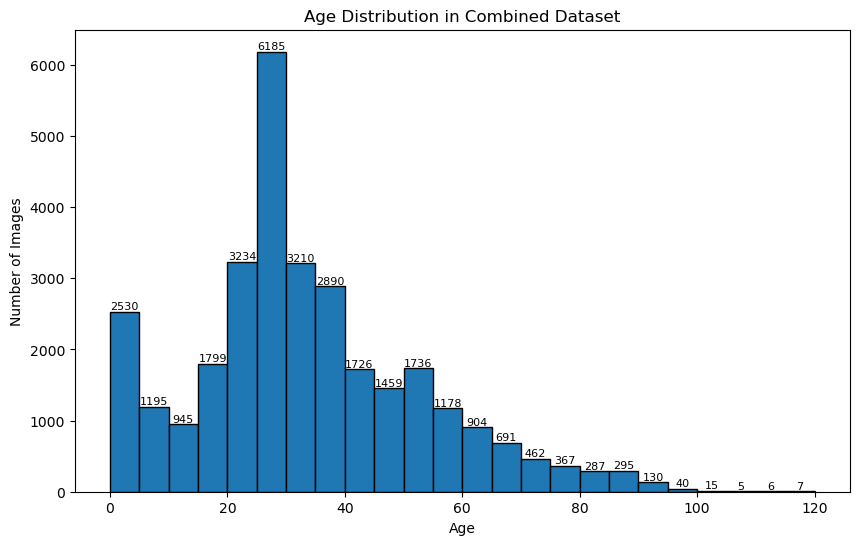

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))

counts, bins, patches = plt.hist(full_df['age'], bins=range(0, 121, 5), edgecolor='black')

plt.title('Age Distribution in Combined Dataset')
plt.xlabel('Age')
plt.ylabel('Number of Images')

for count, patch in zip(counts, patches):
    if count > 0:
        x = patch.get_x() + patch.get_width() / 2
        y = patch.get_height()
        plt.text(x, y, str(int(count)), ha='center', va='bottom', fontsize=8)

plt.show()


C:\Users\mmatu\AppData\Local\Temp\ipykernel_13240\3788488186.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(full_df[full_df["dataset"]=="APPA-REAL"]["age"], label="APPA-REAL", color='blue', shade=True)
C:\Users\mmatu\AppData\Local\Temp\ipykernel_13240\3788488186.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(full_df[full_df["dataset"]=="UTKFace"]["age"], label="UTKFace", color='red', shade=True)


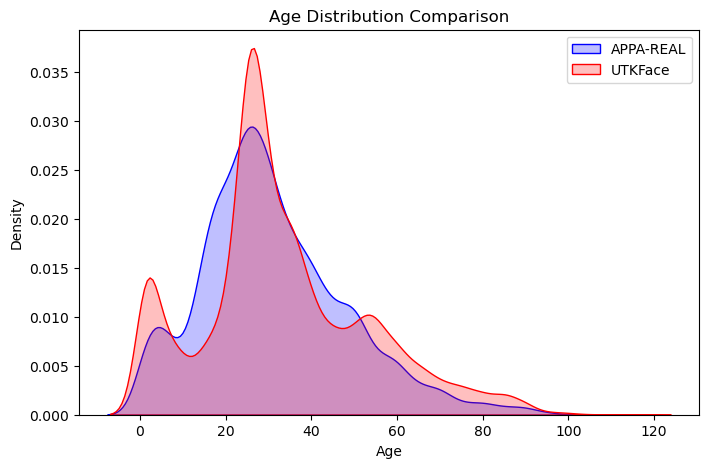

In [40]:
plt.figure(figsize=(8,5))

sns.kdeplot(full_df[full_df["dataset"]=="APPA-REAL"]["age"], label="APPA-REAL", color='blue', shade=True)
sns.kdeplot(full_df[full_df["dataset"]=="UTKFace"]["age"], label="UTKFace", color='red', shade=True)

plt.title("Age Distribution Comparison")
plt.xlabel("Age")
plt.ylabel("Density")
plt.legend();

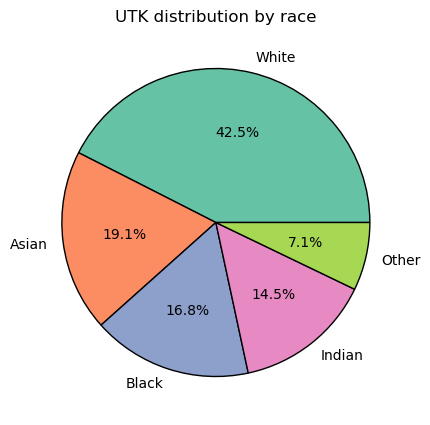

In [68]:
plt.figure(figsize=(8,5))
plt.pie(utk_df['race'].value_counts(), labels=utk_df["race"].unique(), autopct='%1.1f%%', colors=sns.color_palette('Set2'), wedgeprops={'edgecolor':'black'})
plt.title("UTK distribution by race");

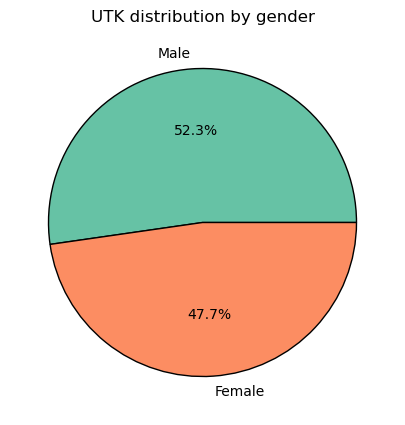

In [69]:
plt.figure(figsize=(8,5))
plt.pie(utk_df['gender'].value_counts(), labels=utk_df["gender"].unique(), autopct='%1.1f%%', colors=sns.color_palette('Set2'), wedgeprops={'edgecolor':'black'})
plt.title("UTK distribution by gender");


--- UTKFace ---
Youngest: 1_0_0_20161219140623097.jpg.chip.jpg → Age: 1
Oldest: 116_1_0_20170112213001988.jpg.chip.jpg → Age: 116


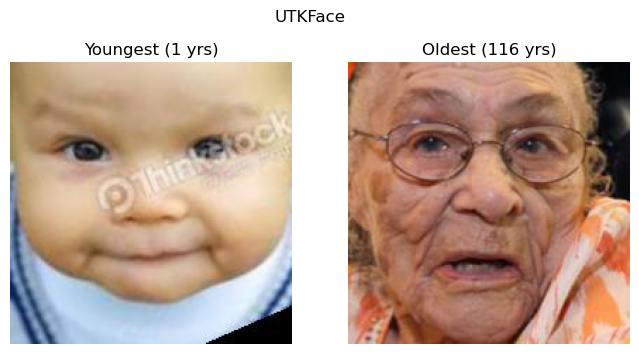


--- APPA-REAL ---
Youngest: 000013.jpg → Age: 1
Oldest: 002661.jpg → Age: 100


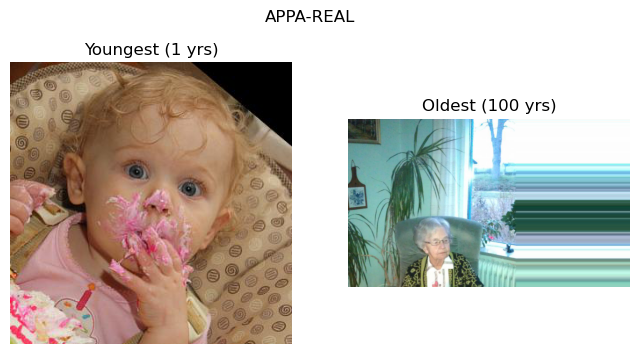

In [77]:
import matplotlib.pyplot as plt
from PIL import Image

def show_image(dataset_df, dataset_name, image_root):
    youngest = dataset_df.loc[dataset_df['age'].idxmin()]
    oldest = dataset_df.loc[dataset_df['age'].idxmax()]

    print(f"\n--- {dataset_name} ---")
    print("Youngest:", youngest["file_name"], "→ Age:", youngest["age"])
    print("Oldest:", oldest["file_name"], "→ Age:", oldest["age"])

    youngest_img = Image.open(os.path.join(image_root, youngest["file_name"]))
    oldest_img = Image.open(os.path.join(image_root, oldest["file_name"]))

    plt.figure(figsize=(8,4))

    plt.subplot(1, 2, 1)
    plt.imshow(youngest_img)
    plt.title(f"Youngest ({youngest['age']} yrs)")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(oldest_img)
    plt.title(f"Oldest ({oldest['age']} yrs)")
    plt.axis("off")

    plt.suptitle(dataset_name)
    plt.show()

# ------------------
# Display UTKFace
# ------------------
show_image(utk_df, "UTKFace", "UTKFace")

# ------------------
# Display APPA-REAL
# ------------------
appa_image_root = os.path.join("APPA-REAL-FACE-CROPPED", "final_files", "final_files")
show_image(appa_df, "APPA-REAL", appa_image_root)
